### <i> Predicting Energy Consumption Patterns with ML Techniques for Sustainable Urban Development 25209 </i>
### <i> Dataset Link -->  https://www.kaggle.com/datasets/taruneshburman/energy-consumption-forecasting </i>
### <i> Import Library Files </i>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### <i> LOad The Dataset </i>

In [2]:
df = pd.read_csv("Energy_Consumption_Forecasting.csv")
df

,Solar Irradiance (kWh/m²),Average Temperature (°C),Wind Speed (m/s),Humidity (%),Cloud Cover (%),Atmospheric Pressure (hPa),Daily Sunshine Duration (hours),Panel Orientation (degrees),System Efficiency (%),Type of Renewable System,Energy Consumption Category
0,3.745401,-0.743354,3.925585,70.543269,57.199588,989.363552,7.779083,13.967804,74.824113,Solar,1
1,9.507143,17.095047,3.704682,81.701326,80.543233,997.343566,2.068636,67.238110,71.855470,Wind,2
2,7.319939,33.647292,13.593819,32.542111,76.016093,1035.454739,10.468735,299.248490,18.617878,Solar,1
3,5.986585,26.611244,3.743193,66.238669,15.389990,984.000439,7.357395,276.036608,93.031516,Wind,2
4,1.560186,30.328057,4.079246,61.457138,14.924947,1036.964968,1.886447,126.231369,61.162498,Solar,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.915821,22.847758,12.979436,49.789633,89.739732,1018.443536,6.956845,98.337463,56.343655,Solar,0
996,9.173136,37.830731,2.359098,40.096106,11.938101,1000.322041,8.004442,75.426921,24.883338,Solar,1
997,1.368186,-6.552099,4.646818,45.511508,32.784284,1026.514885,10.938923,163.918350,97.994153,Wind,1
998,9.502374,-7.147264,4.350683,57.694653,81.574538,998.529063,4.147442,327.037517,19.713210,Solar,0


### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Solar Irradiance (kWh/m²)        1000 non-null   float64
 1   Average Temperature (°C)         1000 non-null   float64
 2   Wind Speed (m/s)                 1000 non-null   float64
 3   Humidity (%)                     1000 non-null   float64
 4   Cloud Cover (%)                  1000 non-null   float64
 5   Atmospheric Pressure (hPa)       1000 non-null   float64
 6   Daily Sunshine Duration (hours)  1000 non-null   float64
 7   Panel Orientation (degrees)      1000 non-null   float64
 8   System Efficiency (%)            1000 non-null   float64
 9   Type of Renewable System         1000 non-null   object 
 10  Energy Consumption Category      1000 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 86.1+ KB


In [4]:
df.describe()

,Solar Irradiance (kWh/m²),Average Temperature (°C),Wind Speed (m/s),Humidity (%),Cloud Cover (%),Atmospheric Pressure (hPa),Daily Sunshine Duration (hours),Panel Orientation (degrees),System Efficiency (%),Energy Consumption Category
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.902566,15.350865,7.536086,54.133754,49.410532,999.846449,5.919706,173.653422,53.784702,1.084000
std,2.921374,14.609495,4.360113,25.784041,28.680994,28.919481,3.476804,102.569183,25.401107,0.830442
min,0.046320,-9.839087,0.000175,10.058805,0.003072,950.618382,0.017140,0.086762,10.021864,0.000000
25%,2.359733,2.053714,3.920265,31.771069,24.497401,974.938000,2.882660,84.956145,32.444534,0.000000
50%,4.968074,15.936695,7.509209,53.585136,49.459810,999.040282,5.815716,174.236651,53.083086,1.000000
75%,7.443196,28.023253,11.386553,76.378673,73.999345,1023.985178,9.077572,257.207850,74.431448,2.000000
max,9.997177,39.970686,14.967313,99.960193,99.774939,1049.935030,11.993528,359.605692,99.641151,2.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])



Missing Values:
Series([], dtype: int64)


### <i> Expolatory Data Analysis And Visulizations </i>

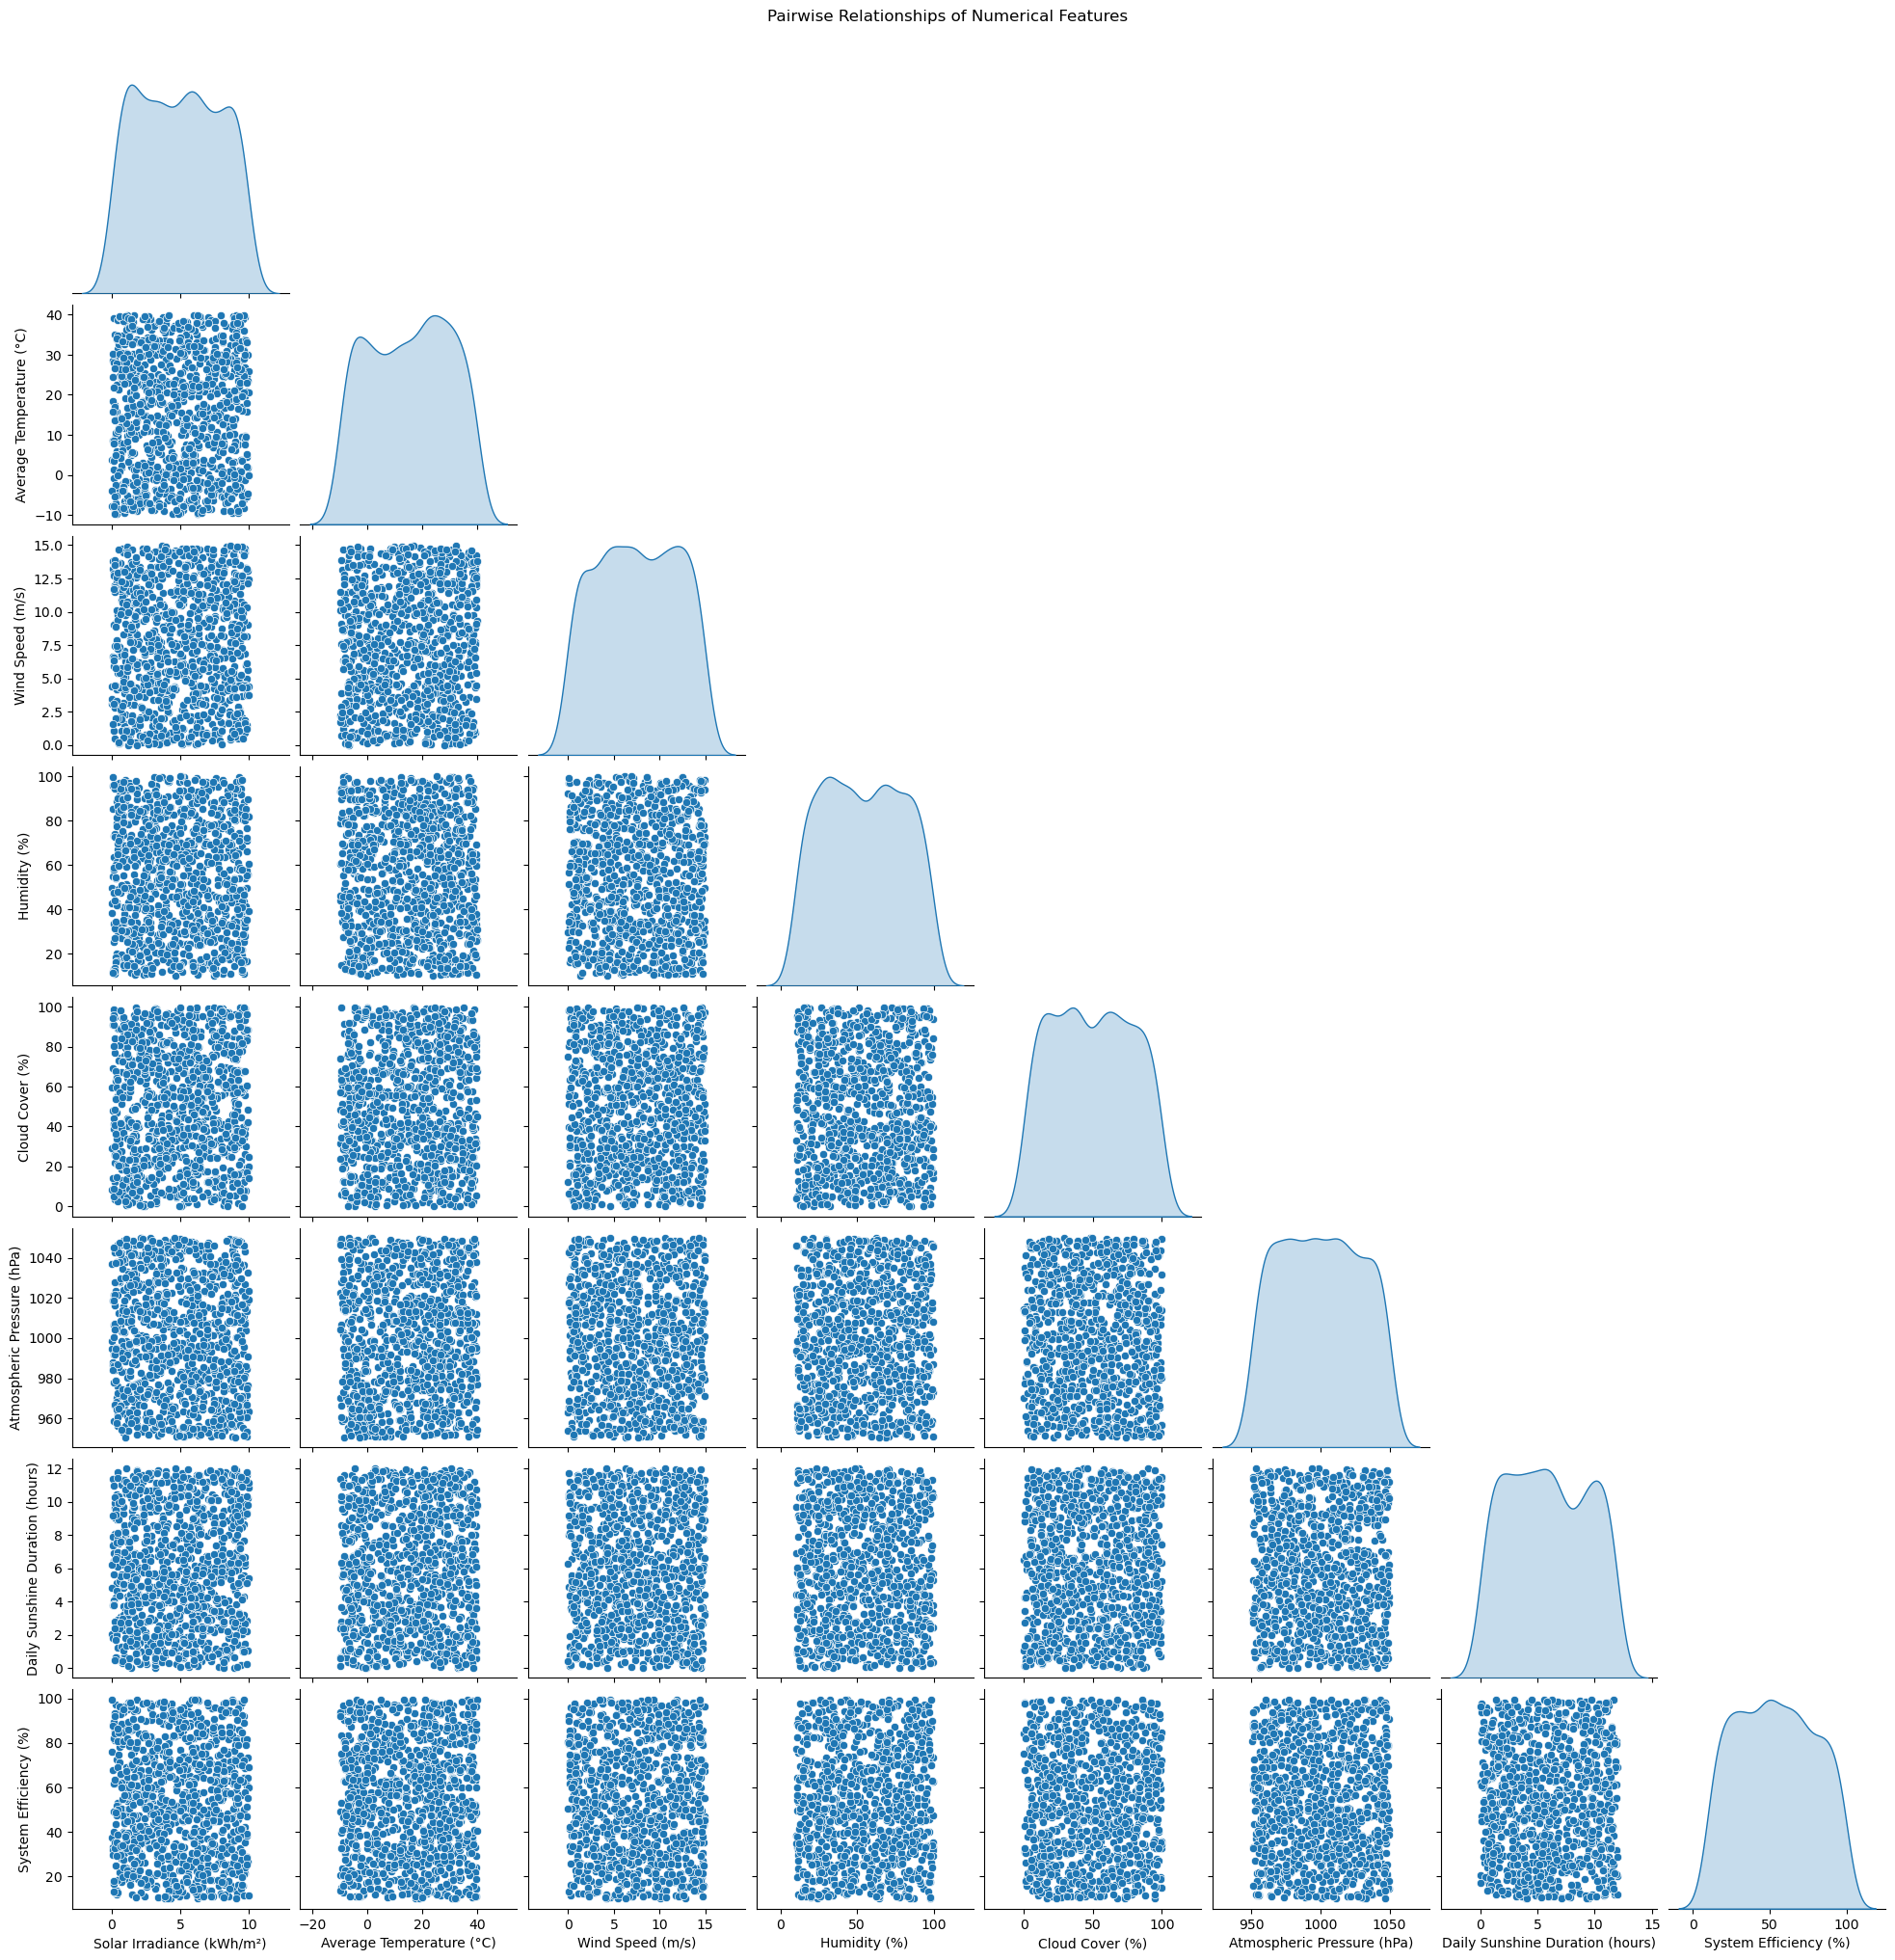

In [6]:
# Pairplot for numerical features
numerical_features = [
    'Solar Irradiance (kWh/m²)', 'Average Temperature (°C)', 'Wind Speed (m/s)',
    'Humidity (%)', 'Cloud Cover (%)', 'Atmospheric Pressure (hPa)', 
    'Daily Sunshine Duration (hours)', 'System Efficiency (%)'
]
sns.pairplot(df[numerical_features], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of Numerical Features", y=1.02)
plt.show()

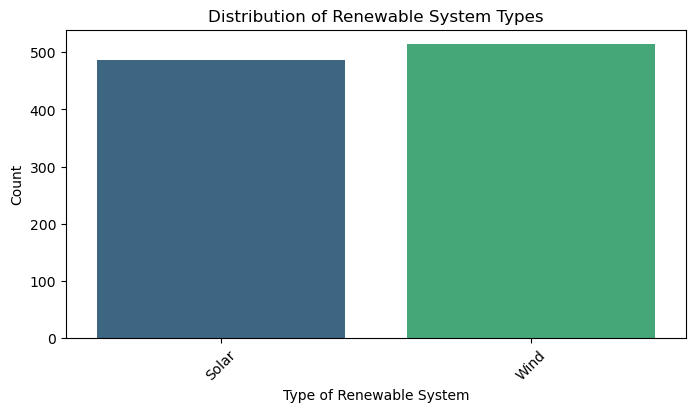

In [7]:
# Count plot for categorical feature
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Type of Renewable System', palette='viridis')
plt.title("Distribution of Renewable System Types")
plt.xlabel("Type of Renewable System")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

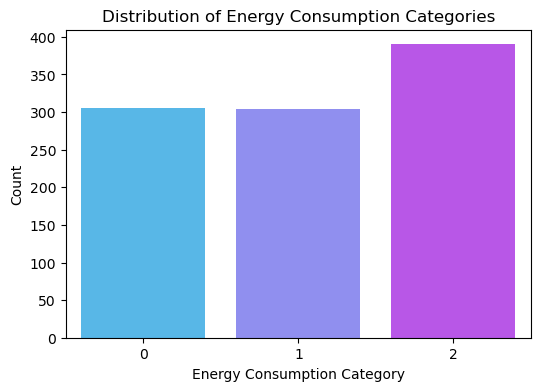

In [8]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Energy Consumption Category', palette='cool')
plt.title("Distribution of Energy Consumption Categories")
plt.xlabel("Energy Consumption Category")
plt.ylabel("Count")
plt.show()

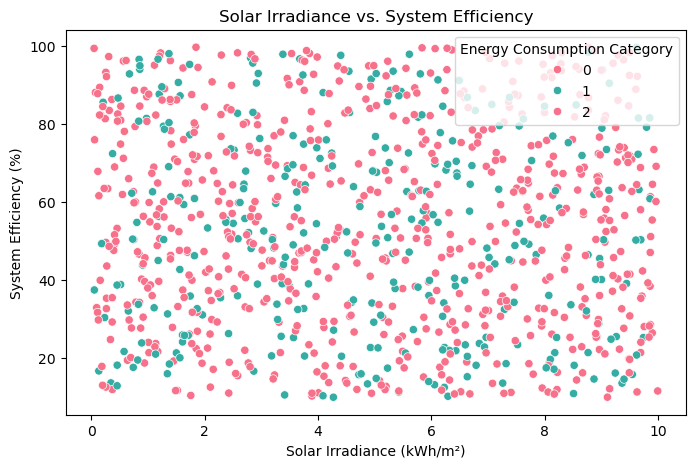

In [9]:
# Scatter plot for Solar Irradiance vs. System Efficiency with category hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Solar Irradiance (kWh/m²)', y='System Efficiency (%)', hue='Energy Consumption Category', palette='husl')
plt.title("Solar Irradiance vs. System Efficiency")
plt.xlabel("Solar Irradiance (kWh/m²)")
plt.ylabel("System Efficiency (%)")
plt.legend(title="Energy Consumption Category")
plt.show()

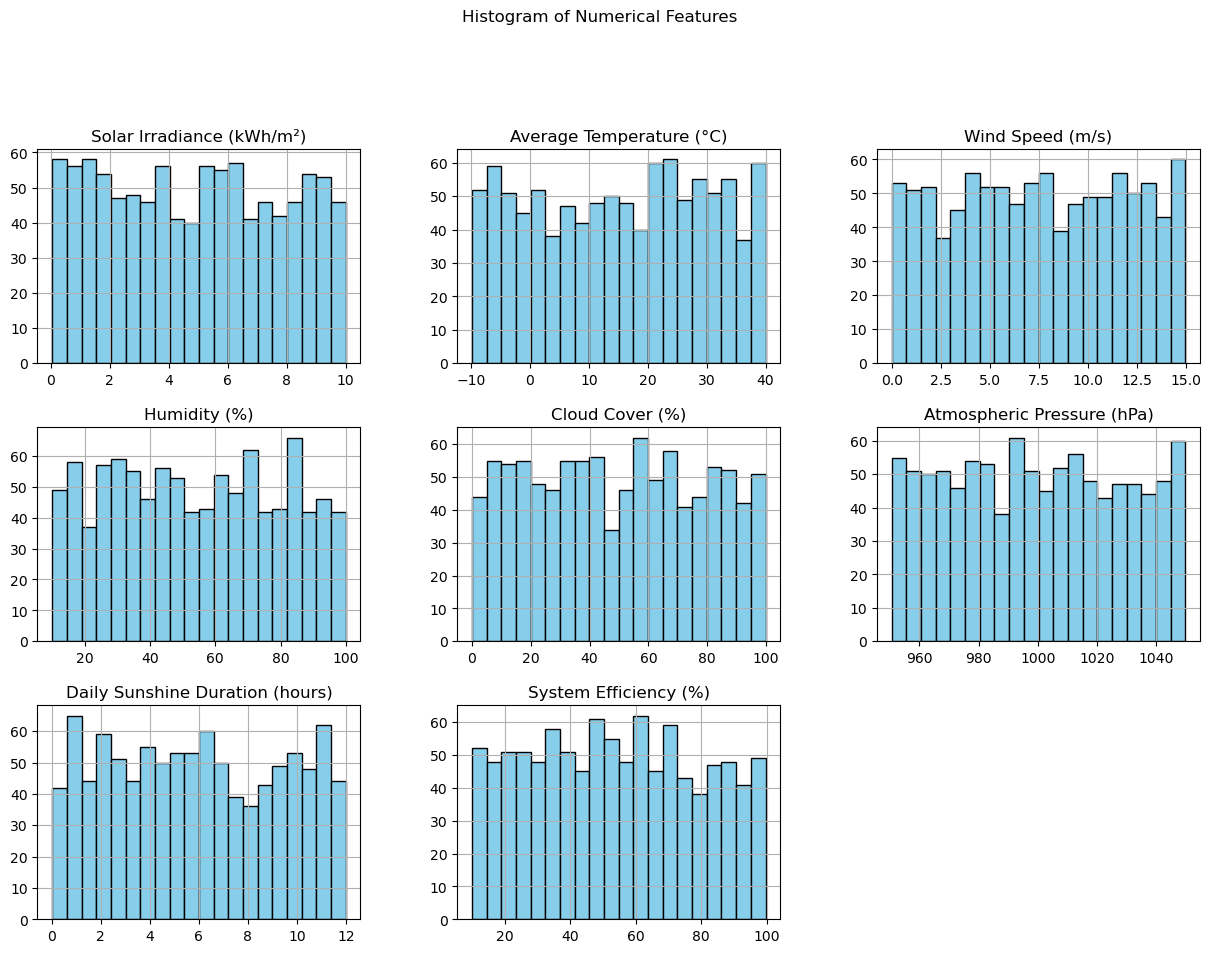

In [10]:
# Histogram for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=20, edgecolor='black', color='skyblue')
plt.suptitle("Histogram of Numerical Features", y=1.02)
plt.show()

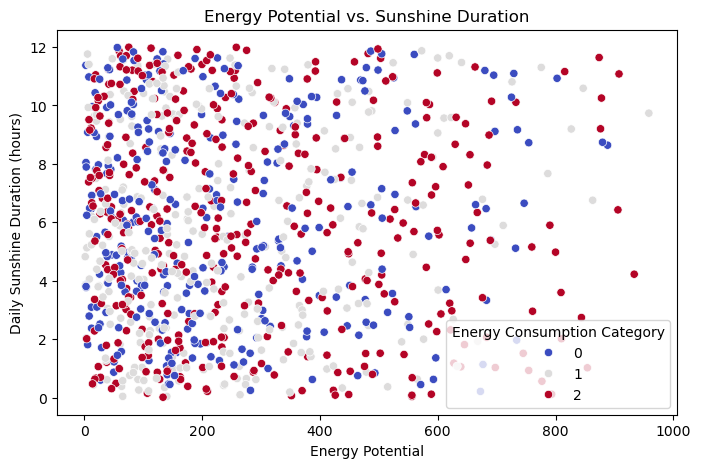

In [11]:
# Feature Interactions - Energy Potential
df['Energy Potential'] = df['Solar Irradiance (kWh/m²)'] * df['System Efficiency (%)']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Energy Potential', y='Daily Sunshine Duration (hours)', hue='Energy Consumption Category', palette='coolwarm')
plt.title("Energy Potential vs. Sunshine Duration")
plt.xlabel("Energy Potential")
plt.ylabel("Daily Sunshine Duration (hours)")
plt.legend(title="Energy Consumption Category")
plt.show()

### <i> Data Preprocessing </i>

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# Step 1: Handling Missing Values
# Identify columns with missing values
missing_values = df.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])

# Impute missing values for numerical and categorical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
cat_features = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')  # Replace missing numerical values with the mean
cat_imputer = SimpleImputer(strategy='most_frequent')  # Replace missing categorical values with the mode

df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())  # Ensure no missing values remain

# Step 2: Encoding Categorical Features
# Encode 'Type of Renewable System' using LabelEncoder
le = LabelEncoder()
df['Type of Renewable System'] = le.fit_transform(df['Type of Renewable System'])

# Display the mapping of the encoder
print("\nEncoding for 'Type of Renewable System':")
for i, class_ in enumerate(le.classes_):
    print(f"{class_}: {i}")

# Step 3: Feature Engineering
# Add a feature for Energy Potential
df['Energy Potential'] = df['Solar Irradiance (kWh/m²)'] * df['System Efficiency (%)']

# Step 4: Handling Outliers
# Replace extreme outliers with the 1st and 99th percentiles
def handle_outliers(col):
    lower_bound = np.percentile(col, 1)
    upper_bound = np.percentile(col, 99)
    return np.clip(col, lower_bound, upper_bound)

for col in num_features:
    if col != 'Energy Consumption Category':  # Exclude target variable
        df[col] = handle_outliers(df[col])

# Step 5: Splitting Features and Target
X = df.drop(columns=['Energy Consumption Category'])
y = df['Energy Consumption Category']

# Step 6: Splitting the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Feature Scaling
# Standardize numerical features
num_features = [
    'Solar Irradiance (kWh/m²)', 'Average Temperature (°C)', 'Wind Speed (m/s)',
    'Humidity (%)', 'Cloud Cover (%)', 'Atmospheric Pressure (hPa)',
    'Daily Sunshine Duration (hours)', 'Panel Orientation (degrees)', 
    'System Efficiency (%)', 'Energy Potential'
]

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Display processed dataset information
print("\nProcessed Training Data:")
print(X_train.head())
print("\nProcessed Test Data:")
print(X_test.head())




Columns with missing values:
Series([], dtype: int64)

Missing values after imputation:
0

Encoding for 'Type of Renewable System':
Solar: 0
Wind: 1

Processed Training Data:
     Solar Irradiance (kWh/m²)  Average Temperature (°C)  Wind Speed (m/s)  \
756                   0.459201                  1.518899         -0.105799   
46                   -0.605562                 -0.951663         -1.494014   
236                  -0.712393                  1.195148          1.351407   
284                   0.314892                 -0.633749         -1.244349   
463                   0.332463                  0.492986          0.237145   

     Humidity (%)  Cloud Cover (%)  Atmospheric Pressure (hPa)  \
756     -1.065312        -1.709619                    0.468398   
46      -0.230969        -0.583097                   -0.019969   
236     -0.942940        -1.546854                    0.680198   
284     -0.078250         0.199748                   -0.122014   
463      0.387785        

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [13]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Results:
Confusion Matrix:
 [[11  9 41]
 [11  5 45]
 [16 11 51]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.29      0.18      0.22        61
         1.0       0.20      0.08      0.12        61
         2.0       0.37      0.65      0.47        78

    accuracy                           0.34       200
   macro avg       0.29      0.31      0.27       200
weighted avg       0.29      0.34      0.29       200

Accuracy Score: 0.335


### <i> Random Forest Classifier </i>

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))



Random Forest Classifier Results:
Confusion Matrix:
 [[13 16 32]
 [ 7 18 36]
 [14 26 38]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.21      0.27        61
         1.0       0.30      0.30      0.30        61
         2.0       0.36      0.49      0.41        78

    accuracy                           0.34       200
   macro avg       0.35      0.33      0.33       200
weighted avg       0.35      0.34      0.34       200

Accuracy Score: 0.345


### <i> XGB Classifier </i>

In [15]:
# Import necessary libraries
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("\nXGBoost Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))



XGBoost Classifier Results:
Confusion Matrix:
 [[17 17 27]
 [18 17 26]
 [25 22 31]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.28      0.28      0.28        61
         1.0       0.30      0.28      0.29        61
         2.0       0.37      0.40      0.38        78

    accuracy                           0.33       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.32      0.33      0.32       200

Accuracy Score: 0.325


### <i> Comparison Of All Models </i>


Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.335   0.294472   0.335  0.288266
1        Random Forest     0.345   0.347929   0.345  0.335304
2              XGBoost     0.325   0.322935   0.325  0.323594


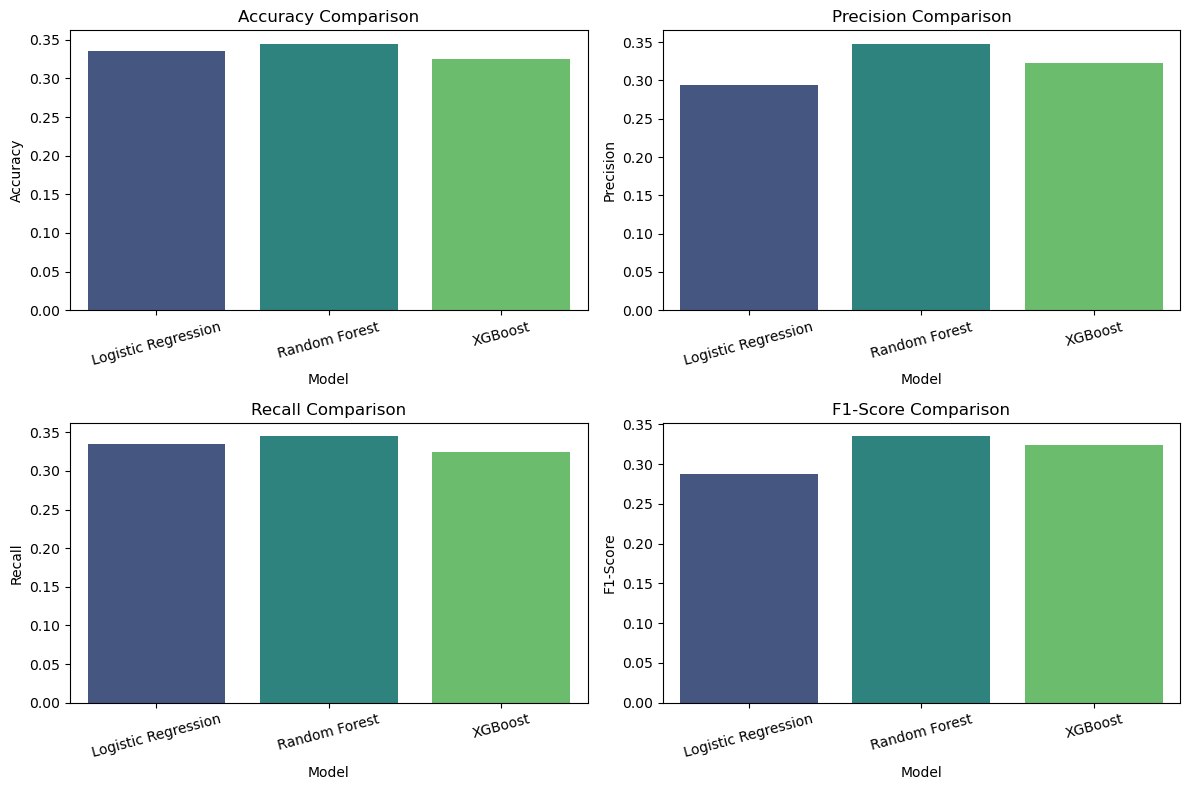

In [16]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Store evaluation metrics in a dictionary
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
    ],
    "Precision": [
        classification_report(y_test, y_pred_logreg, output_dict=True)["weighted avg"]["precision"],
        classification_report(y_test, y_pred_rf, output_dict=True)["weighted avg"]["precision"],
        classification_report(y_test, y_pred_xgb, output_dict=True)["weighted avg"]["precision"],
    ],
    "Recall": [
        classification_report(y_test, y_pred_logreg, output_dict=True)["weighted avg"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["weighted avg"]["recall"],
        classification_report(y_test, y_pred_xgb, output_dict=True)["weighted avg"]["recall"],
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_logreg, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_rf, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_xgb, output_dict=True)["weighted avg"]["f1-score"],
    ],
}

# Convert results to a DataFrame for easier handling
results_df = pd.DataFrame(model_results)

# Print the comparison table
print("\nModel Comparison:")
print(results_df)

# Visualization of Model Comparison
plt.figure(figsize=(12, 8))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()
